In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklear n.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# Function to load and preprocess image data
def load_and_preprocess_data(data_dir):
    X = []
    Z = []

    for flower_type in os.listdir(data_dir):
        flower_path = os.path.join(data_dir, flower_type)
        for img in tqdm(os.listdir(flower_path)):
            img_path = os.path.join(flower_path, img)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (224, 224))
            X.append(np.array(img))
            Z.append(str(flower_type))

    le = LabelEncoder()
    Y = le.fit_transform(Z)
    Y = to_categorical(Y, 5)
    X = np.array(X)
    X = X / 255.0  # Normalize pixel values to [0, 1]

    return X, Y

# Load and preprocess data
data_dir = "C:\\Users\\HP\\Desktop\\ai_arch_project\\NewFlowers\\All_Flowers" 
  
X, Y = load_and_preprocess_data(data_dir)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model definition
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate reduction callback
red_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.1)

# Train the model
batch_size = 16
epochs = 20

History = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_test, y_test), callbacks=[red_lr])
                    


  0%|          | 0/1424 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:14<00:00, 68.34it/s]


MemoryError: Unable to allocate 4.53 GiB for an array with shape (4039, 224, 224, 3) and data type float64

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
import matplotlib.pyplot as plt


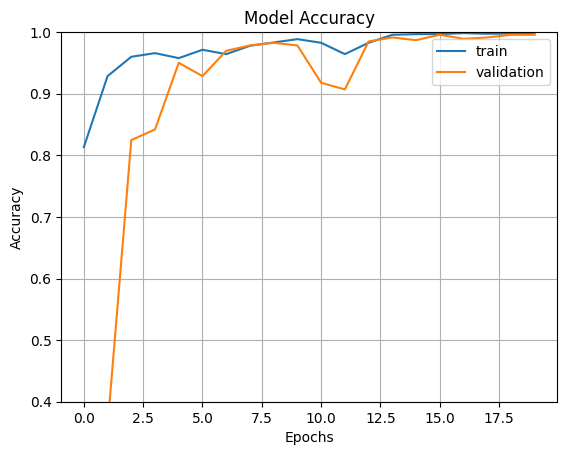

In [ ]:
fig1 = plt.gcf()
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

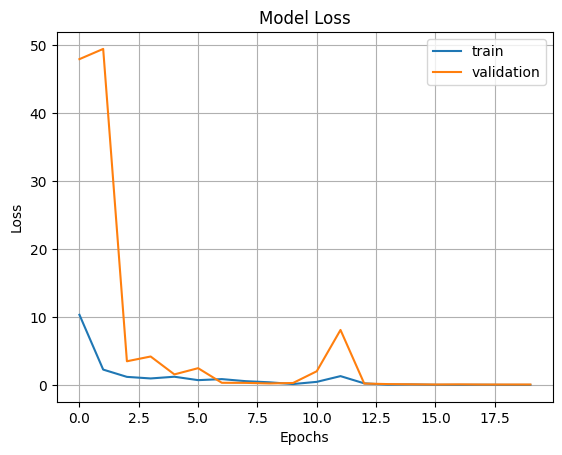

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.save('all_flower_model.h5')

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
